If the similarity score is high then same "shot", if it's low then "noshot"
We assume "shot" means the frames stay in the same shot, and "noshot" means the frame goes to another shot.
We have to choose (Positive, Negative), (True, Flase) and (threshold)

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/Exercise 1 - Improved.txt', sep="\t")

In [6]:
print(df)

     Similarity   Label
0         0.920  noshot
1         0.004    shot
2         0.838  noshot
3         0.925  noshot
4         0.737  noshot
..          ...     ...
195       0.986  noshot
196       0.843    shot
197       0.000    shot
198       0.895  noshot
199       0.296    shot

[200 rows x 2 columns]


In [ ]:
# Assuming the values are 'shot' and ' noshot' (with an extra space)
label_mapping = {'shot': 'negative', 'noshot': 'positive'}

# Apply the mapping
df['Label'] = df['Label'].map(label_mapping)

# Check the transformed DataFrame
print(df.values)


In [8]:
# Define a threshold
threshold = 0.5

# Function to apply the threshold
def apply_threshold(value):
    if value >= threshold:
        return "True"
    else:
        return "False"

# Apply the function to the 'Similarity' column
df['Predicted_Condition'] = df['Similarity'].apply(apply_threshold)

# Now df contains a new column 'Predicted_Condition' with values 'True' or 'False'
print(df)

     Similarity     Label Predicted_Condition
0         0.920  positive                True
1         0.004  negative               False
2         0.838  positive                True
3         0.925  positive                True
4         0.737  positive                True
..          ...       ...                 ...
195       0.986  positive                True
196       0.843  negative                True
197       0.000  negative               False
198       0.895  positive                True
199       0.296  negative               False

[200 rows x 3 columns]


In [203]:
def compute_confusion_matrix(df, actual_label_col, similarity_col, threshold):
    TP = TN = FP = FN = 0

    for index, row in df.iterrows():
        actual_label = row[actual_label_col]
        similarity = row[similarity_col]

        # Predicted condition based on threshold
        predicted_condition = similarity >= threshold

        # Increment count for TP, TN, FP, FN
        if predicted_condition and actual_label == 'positive':
            TP += 1
        elif not predicted_condition and actual_label == 'negative':
            TN += 1
        elif predicted_condition and actual_label == 'negative':
            FP += 1
        elif not predicted_condition and actual_label == 'positive':
            FN += 1

    return TP, TN, FP, FN

# Example usage:
# Assuming df is your DataFrame, 'Label' is the actual label column, and 'Similarity' is the similarity column
TP, TN, FP, FN = compute_confusion_matrix(df, 'Label', 'Similarity', 0.5)
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


TP: 140, TN: 46, FP: 14, FN: 0


In [204]:
# Calculate metrics based on the confusion matrix
def calculate_metrics(TP, TN, FP, FN):
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0
    ACC = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    return TPR, TNR, ACC

# Assuming df is your DataFrame, 'Label' is the actual label column, and 'Similarity' is the similarity column
TP, TN, FP, FN = compute_confusion_matrix(df, 'Label', 'Similarity', 0.5)

# Calculate and print the metrics
TPR, TNR, ACC = calculate_metrics(TP, TN, FP, FN)
print(f"Sensitivity (TPR): {TPR}")
print(f"Specificity (TNR): {TNR}")
print(f"Accuracy (ACC): {ACC}")

Sensitivity (TPR): 1.0
Specificity (TNR): 0.7666666666666667
Accuracy (ACC): 0.93


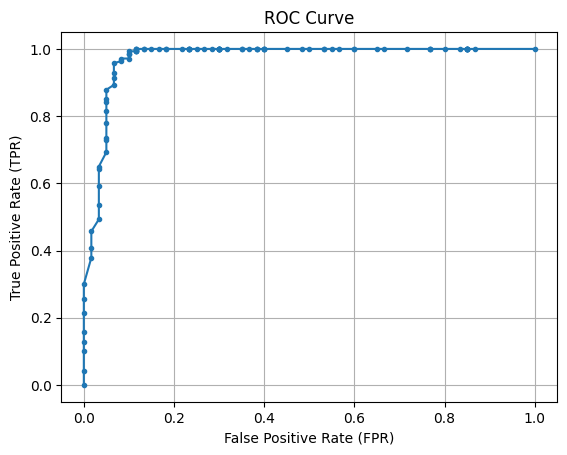

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [212]:
def compute_ROC_curve(df, actual_label_col, similarity_col):
    thresholds = np.arange(0,1.01,0.01)  # Thresholds ranging from 0 to 1
    TPR_values = []
    FPR_values = []

    for threshold in thresholds:
        TP, TN, FP, FN = compute_confusion_matrix(df, actual_label_col, similarity_col, threshold)
        TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    return thresholds, TPR_values, FPR_values

# Assuming df is your DataFrame, 'Label' is the actual label column, and 'Similarity' is the similarity column
thresholds, TPR_values, FPR_values = compute_ROC_curve(df, 'Label', 'Similarity')

# Plotting the ROC Curve
plt.figure()
plt.plot(FPR_values, TPR_values, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()
print(thresholds)

##C)

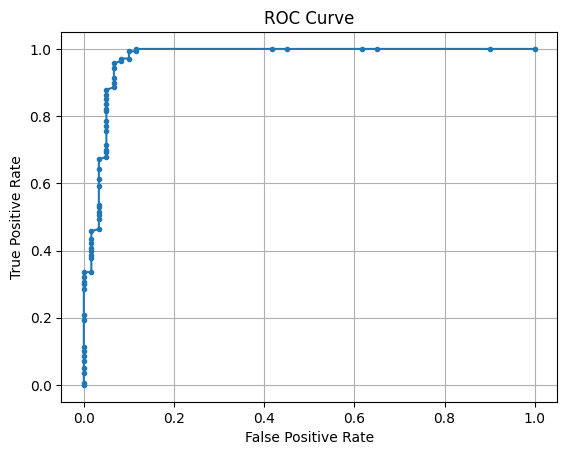

In [218]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Convert labels to binary (assuming 'positive' is 1 and 'negative' is 0)
df['Binary_Label'] = df['Label'].map({'positive': 1, 'negative': 0})

# True labels and predicted scores
true_labels = df['Binary_Label']
predicted_scores = df['Similarity']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [222]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import numpy as np

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)

# Find the optimal threshold (closest to top-left)
optimal_idx = np.argmin(np.sqrt(fpr**2 + (1-tpr)**2))
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to get predicted labels
predicted_labels = predicted_scores >= optimal_threshold

# Calculate accuracy at this threshold
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Accuracy at Optimal Threshold: {accuracy}")

# Calculate the AUC
auc = roc_auc_score(true_labels, predicted_scores)

print(f"Area Under the ROC Curve (AUC): {auc}")


Optimal Threshold: 0.736
Accuracy at Optimal Threshold: 0.95
Area Under the ROC Curve (AUC): 0.9713095238095238


In [225]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np
from sklearn.metrics import average_precision_score

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_scores)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
# Find the index of the maximum F1 score
optimal_idx = np.nanargmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to get predicted labels
predicted_labels = predicted_scores >= optimal_threshold

# Calculate metrics at this threshold
optimal_f1 = f1_scores[optimal_idx]
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Accuracy at Optimal Threshold: {accuracy}")
print(f"Optimal F1 Score: {optimal_f1}")
# Calculate the AUC
auc = roc_auc_score(true_labels, predicted_scores)

print(f"Area Under the ROC Curve (AUC): {auc}")


Optimal Threshold: 0.625
Accuracy at Optimal Threshold: 0.965
Optimal F1 Score: 0.975609756097561
Area Under the ROC Curve (AUC): 0.9713095238095238


In [221]:
from sklearn.metrics import roc_auc_score

# Assuming 'Label' is the actual label column and 'Similarity' is the predicted score column
true_labels = df['Label'].map({'positive': 1, 'negative': 0}).values
predicted_scores = df['Similarity'].values

# Calculate AUC for the iterative method
auc_iterative = roc_auc_score(true_labels, predicted_scores)
print(f"AUC for Iterative Method: {auc_iterative}")

# Calculate AUC for the Scikit-Learn method
auc_sklearn = roc_auc_score(true_labels, predicted_scores)
print(f"AUC for Scikit-Learn Method: {auc_sklearn}")


AUC for Iterative Method: 0.9713095238095238
AUC for Scikit-Learn Method: 0.9713095238095238
